# Walking-Forward VAR Model with all Variables - Monthly Data

In [2]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

#import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [87]:
dwfm1 = pd.read_csv("../Data/monthly_data.csv")
dwfm1 = dwfm1.dropna()

In [88]:
# convert DateTime column into datetime format
dwfm1["datetime"] = pd.to_datetime(dwfm1['datetime'])
# set DateTime as index
dwfm1.set_index("datetime", inplace=True)
dwfm1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2012-02-29 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   94 non-null     float64
 1   suction_tension (40cm)   94 non-null     float64
 2   suction_tension (70cm)   94 non-null     float64
 3   water_temperature        94 non-null     float64
 4   barometric_pressure_qfe  94 non-null     float64
 5   dew_point                94 non-null     float64
 6   water_level              94 non-null     float64
 7   inflow_linth (m3/s)      94 non-null     float64
 8   outflow_limmat (m3/s)    94 non-null     float64
 9   precipitation (mm)       94 non-null     float64
 10  Evapotranspiration (mm)  94 non-null     float64
 11  change_rate              94 non-null     float64
dtypes: float64(12)
memory usage: 9.5 KB


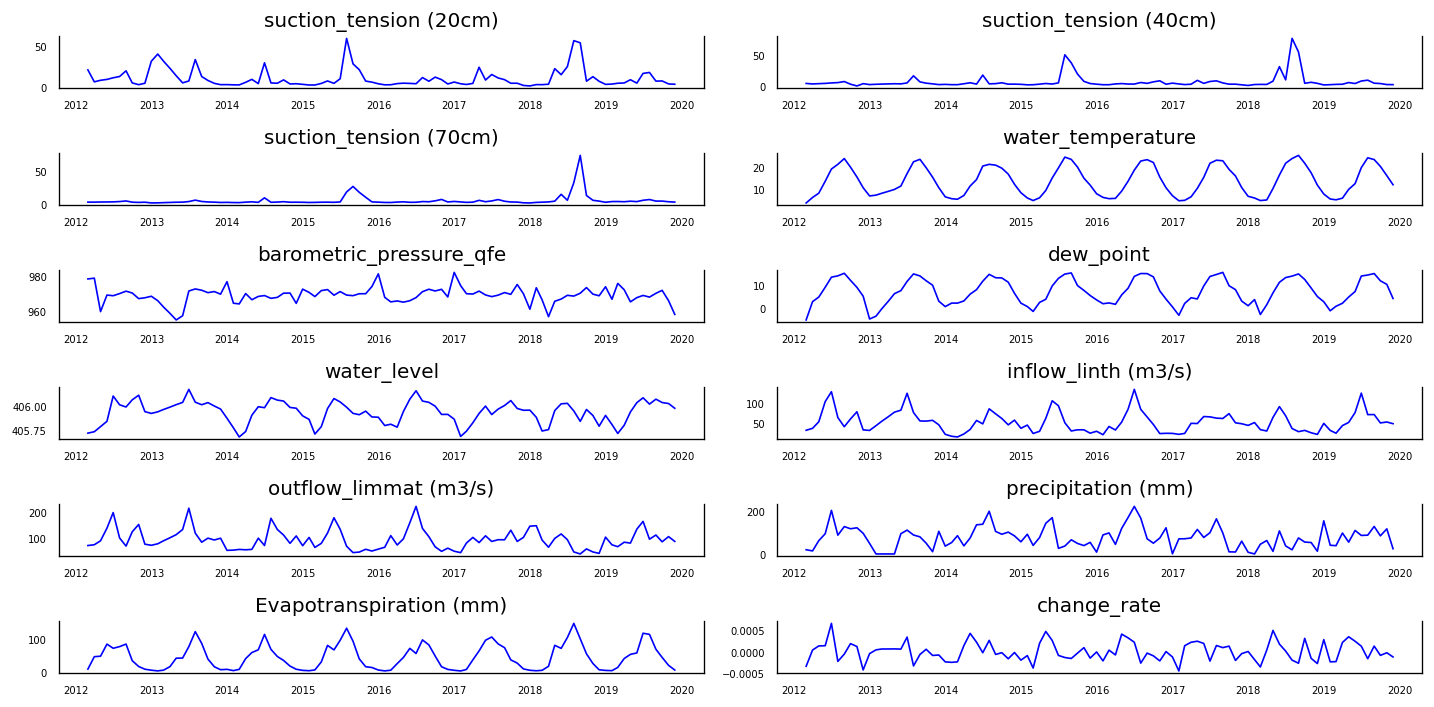

In [89]:
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data2 = dwfm1[dwfm1.columns[i]]
    ax.plot(data2, color='blue', linewidth=1)
    # Decorations
    ax.set_title(dwfm1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [ ]:
# drop variable change rate
# dwfm1.drop(columns="change_rate", inplace=True)

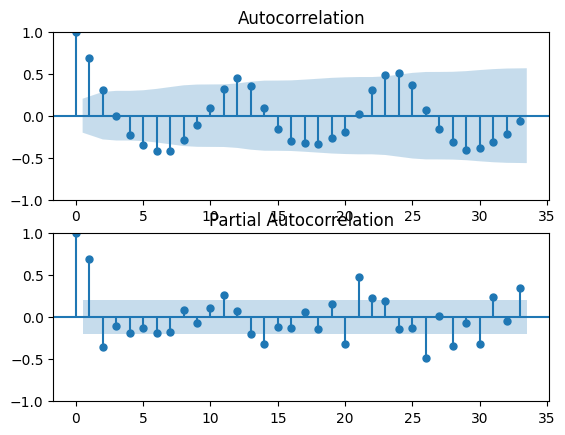

In [9]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(dwfm1["water_level"], lags=33, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dwfm1["water_level"], lags=33, ax=ax[1])
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [11]:
for name, column in dwfm1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5499
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.553
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

As we can see Evapotranspiration, dew point and water level are non-stationary. We are therefore going to difference them to try to make them stationary.

In [90]:
dwfm1_diff = dwfm1.diff().dropna()

In [13]:
for name, column in dwfm1_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7853
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.2456
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

By observing the graphs, water level, evapotranspiration and dew point are stationary.

**4. Splitting the data into train and test set.**

In [91]:
def train_split(dvar, nobs):
    dvar_train, dvar_test = dvar[0:-nobs], dvar[-nobs:]
    return dvar_train, dvar_test

In [92]:
dwfm1_train, dwfm1_test = train_split(dwfm1, 11)

In [93]:
dwfm1_diff_train, dwfm1_diff_test = train_split(dwfm1_diff, 11)

In [16]:
def ts_train_test_split(dwfm1_diff, test_size):
    len_test = int(dwfm1_diff.shape[0]*test_size)
    split_point = dwfm1_diff.index[-len_test]
    dwfm1_diff_train = dwfm1_diff[dwfm1_diff.index < split_point]
    dwfm1_diff_test = dwfm1_diff[dwfm1_diff.index >= split_point]
    
    return dwfm1_diff_train, dwfm1_diff_test


In [17]:
#dwfm1_diff_train, dwfm1_diff_test = ts_train_test_split(dwfm1_diff, 0.125)

In [94]:
varmodel2 = VAR(dwfm1_diff_train)
varmodel2.select_order(maxlags=4).summary()

,AIC,BIC,FPE,HQIC
0,21.29,21.65,1.763e+09,21.44
1,1.281,5.995*,3.740,3.168
2,0.2870,9.351,1.765,3.916
3,-2.450,10.96,0.2325,2.920
4,-5.157*,12.61,0.08116*,1.955*


In [108]:
# creating a walk forward fuction that will split a time series into training and testing set, and return a tuple of the test set 
# and the predicited test set
def walk_forward_VAR(dwfm1_diff, nobs, lag_order):
    # splitting the data into train and test set
    dwfm1_diff_train, dwfm1_diff_test = train_split(dwfm1_diff, nobs)
 
    # makes a list of lists from the train set
    history = [list(x) for x in np.array(dwfm1_diff_train)] 
    forecasts = [] # empty list to store our forecasts
    
    for t in range(dwfm1_diff_test.shape[0]): # for each test set,
        # initialize a VAR model on the train set,
        model = VAR(np.array(history)) 
        model_fit = model.fit(lag_order) # fits the model
        
        # forecast just the next time step
        yhat = model_fit.forecast(model.y, steps=1)
        
        # add the forecast to the forecasts list
        forecasts.append(list(yhat[0])) 
        
        # add the actual test value as the last observation of the 
        # train set
        history.append(list(np.array(dwfm1_diff_test)[t])) 
            
    # return a tuple of the test set and the predicited test set as
    # a tuple of dataframes 
    return model_fit, dwfm1_diff_test, pd.DataFrame(np.array(forecasts), index=dwfm1_diff_test.index, columns=dwfm1.columns)

In [109]:
fitmodel, dwfm1_results_test, dwfm1_results_pred = walk_forward_VAR(dwfm1_diff, 11, 2)

In [112]:
fitmodel.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Dec, 2022
Time:                     09:32:51
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    8.41298
Nobs:                     90.0000    HQIC:                   3.44051
Log likelihood:          -1236.07    FPE:                    1.29713
AIC:                    0.0802802    Det(Omega_mle):       0.0684729
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.044481         1.181543           -0.038           0.970
L1.y1         -0.615925         0.269524           -2.285           0.022
L1.y2          0.845234         0.367956            2.297           0.022
L1.y3         -1.

In [ ]:
# creating a walk forward fuction that will split a time series into training and testing set, and return a tuple of the test set 
# and the predicited test set
def forecast_VAR(model, dwfm1_diff, nobs, lag_order):
    # splitting the data into train and test set
    dwfm1_diff_train, dwfm1_diff_test = train_split(dwfm1_diff, nobs)
 
    # makes a list of lists from the train set
    history = [list(x) for x in np.array(dwfm1_diff_train)] 
    forecasts = [] # empty list to store our forecasts
    
    for t in range(dwfm1_diff_test.shape[0]): # for each test set,
        # initialize a VAR model on the train set,
        model = VAR(np.array(history)) 
        model_fit = model.fit(lag_order) # fits the model
        
        # forecast just the next time step
        yhat = model_fit.forecast(model.y, steps=1)
        
        # add the forecast to the forecasts list
        forecasts.append(list(yhat[0])) 
        
        # add the actual test value as the last observation of the 
        # train set
        history.append(list(np.array(dwfm1_diff_test)[t])) 
            
    # return a tuple of the test set and the predicited test set as
    # a tuple of dataframes 
    return model_fit, dwfm1_diff_test, pd.DataFrame(np.array(forecasts), index=dwfm1_diff_test.index, columns=dwfm1.columns)

In [97]:
dwfm1_results_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,0.384260,0.400330,1.074918,-2.246602,-6.989476,-4.006318,-0.096088,-17.500023,-29.471088,-114.4,-0.69,-0.000516
2019-02-28,1.011003,0.487794,0.058283,-0.352599,8.855175,2.017345,-0.094250,-6.856111,-7.233499,-1.8,9.99,0.000004
2019-03-31,0.372076,0.196375,-0.313376,0.733981,-3.544816,1.326318,0.086574,18.847272,17.225391,59.0,27.39,0.000446
2019-04-30,3.976254,2.725311,0.795841,3.950519,-6.751577,2.753592,0.140165,7.822624,-3.413982,-42.5,12.83,0.000132
2019-05-31,-4.185946,-1.560746,-0.602746,2.594197,2.351167,2.462728,0.097804,24.471664,53.683440,54.6,4.44,-0.000104
2019-06-30,12.024374,4.007921,2.014123,7.207379,1.225161,6.881241,0.051417,48.023226,29.816794,-23.3,60.80,-0.000114
2019-07-31,1.180701,1.351966,1.081761,4.414020,-0.922437,0.453545,-0.066667,-53.159834,-68.516123,1.3,-3.56,-0.000291
2019-08-31,-10.739516,-4.841069,-2.301902,-0.794556,2.117350,0.651064,0.052052,0.117118,16.101976,40.8,-45.85,0.000292
2019-09-30,0.213225,-0.561119,-0.024345,-3.078955,1.650736,-3.214008,-0.035321,-20.694125,-26.085498,-44.0,-25.24,-0.000215


In [103]:
def invert_difference(dvar, dvar_forecast): 
    dvar_fc = dvar_forecast.copy()
    #dvar_shift = dvar[-nobs:]
    columns = dvar.columns
    for col in columns:        
        dvar_fc[col] = dvar[col].iloc[-1] + dvar_fc[col]#.cumsum()
    return dvar_fc

In [115]:
import pmdarima as pm

In [152]:
watlev_diff = dwfm1_diff_test["water_level"]
watlev_real = dwfm1_test["water_level"]

In [148]:
c,d=train_split(dwfm1,12)

In [149]:
watlev_real = d["water_level"]
watlev_real

datetime
2018-12-31    405.901111
2019-01-31    405.805023
2019-02-28    405.710773
2019-03-31    405.797347
2019-04-30    405.937512
2019-05-31    406.035317
2019-06-30    406.086734
2019-07-31    406.020067
2019-08-31    406.072119
2019-09-30    406.036799
2019-10-31    406.026259
2019-11-30    405.976116
Name: water_level, dtype: float64

In [140]:
watlev_diff

datetime
2019-01-31   -0.096088
2019-02-28   -0.094250
2019-03-31    0.086574
2019-04-30    0.140165
2019-05-31    0.097804
2019-06-30    0.051417
2019-07-31   -0.066667
2019-08-31    0.052052
2019-09-30   -0.035321
2019-10-31   -0.010540
2019-11-30   -0.050143
Name: water_level, dtype: float64

In [168]:
dwfm1_results_pred["water_level"]

datetime
2019-01-31    0.029825
2019-02-28   -0.077681
2019-03-31   -0.018220
2019-04-30    0.057784
2019-05-31    0.069813
2019-06-30    0.006498
2019-07-31    0.053613
2019-08-31    0.071218
2019-09-30   -0.023274
2019-10-31   -0.084495
2019-11-30   -0.066784
Name: water_level, dtype: float64

In [160]:
watlev_pred = dwfm1_results_pred["water_level"]

In [170]:
inv = pm.utils.diff_inv(watlev_pred, lag=11, differences=1, xi=watlev_diff)
inv

ValueError: ndarray is not C-contiguous

In [158]:
dwfm1_test["water_level"]

datetime
2019-01-31    405.805023
2019-02-28    405.710773
2019-03-31    405.797347
2019-04-30    405.937512
2019-05-31    406.035317
2019-06-30    406.086734
2019-07-31    406.020067
2019-08-31    406.072119
2019-09-30    406.036799
2019-10-31    406.026259
2019-11-30    405.976116
Name: water_level, dtype: float64

In [123]:
dwfm1_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2019-01-31 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   11 non-null     float64
 1   suction_tension (40cm)   11 non-null     float64
 2   suction_tension (70cm)   11 non-null     float64
 3   water_temperature        11 non-null     float64
 4   barometric_pressure_qfe  11 non-null     float64
 5   dew_point                11 non-null     float64
 6   water_level              11 non-null     float64
 7   inflow_linth (m3/s)      11 non-null     float64
 8   outflow_limmat (m3/s)    11 non-null     float64
 9   precipitation (mm)       11 non-null     float64
 10  Evapotranspiration (mm)  11 non-null     float64
 11  change_rate              11 non-null     float64
dtypes: float64(12)
memory usage: 1.1 KB


In [106]:
a,b = train_split(dwfm1,11)


In [107]:
test = invert_difference(b,dwfm1_results_test)
test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,9.496501,6.195455,7.702958,25.274781,2898.845905,5.181989,1217.682251,131.422143,265.146386,220.0,11.11,-0.000081
2019-02-28,13.883632,8.864829,10.951415,30.459631,3874.475762,5.768689,1623.393024,156.988287,332.130376,258.8,23.93,-0.000313
2019-03-31,18.642839,11.730578,13.886495,36.378462,4846.560802,7.681707,2029.190371,201.401704,416.339757,356.6,64.14,-0.000100
2019-04-30,27.378300,17.321639,17.617417,46.247811,5811.894266,12.348317,2435.127884,253.637744,497.135156,411.9,117.18,0.000245
2019-05-31,31.927815,21.351954,20.745592,58.711358,6779.578897,19.477655,2841.163200,330.345449,631.613995,521.8,174.66,0.000486
2019-06-30,48.501704,29.390190,25.887891,78.382284,7748.488688,33.488233,3247.249934,455.076379,795.909628,608.4,292.94,0.000613
2019-07-31,66.256294,38.780392,32.111950,102.467230,8716.476043,47.952357,3653.270001,526.647476,891.689139,696.3,407.66,0.000449
2019-08-31,73.271368,43.329525,36.034107,125.757620,9686.580747,63.067545,4059.342121,598.335691,1003.570625,825.0,476.53,0.000577
2019-09-30,80.499666,47.317539,39.931920,145.969055,10658.336187,74.968726,4465.378919,649.329781,1089.366614,909.7,520.16,0.000490


In [70]:
test_invert = invert_difference(dwfm1, dwfm1_results_test,12)
test_invert

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,3.512765,2.632955,3.472447,9.706681,951.317589,0.030645,405.880028,31.577586,57.769233,-90.0,4.07,-0.000639
2019-02-28,4.139508,2.720419,2.455812,11.600684,967.162241,6.054308,405.881866,42.221498,80.006823,22.6,14.75,-0.000119
2019-03-31,3.500581,2.428999,2.084152,12.687264,954.762250,5.363281,406.062690,67.924881,104.465712,83.4,32.15,0.000322
2019-04-30,7.104759,4.957936,3.193370,15.903802,951.555489,6.790554,406.116281,56.900233,83.826339,-18.1,17.59,0.000009
2019-05-31,-1.057441,0.671879,1.794782,14.547480,960.658233,6.499690,406.073921,73.549273,140.923762,79.0,9.20,-0.000228
2019-06-30,15.152879,6.240546,4.411652,19.160662,959.532227,10.918203,406.027533,97.100835,117.057115,1.1,65.56,-0.000238
2019-07-31,4.309206,3.584590,3.479289,16.367303,957.384629,4.490508,405.909450,-4.082225,18.724199,25.7,1.20,-0.000414
2019-08-31,-7.611011,-2.608444,0.095627,11.158726,960.424416,4.688026,406.028168,49.194727,103.342297,65.2,-41.09,0.000169
2019-09-30,3.341730,1.671505,2.373184,8.874328,959.957801,0.822955,405.940796,28.383484,61.154824,-19.6,-20.48,-0.000339


In [35]:
var = invert_difference(dwfm1, dwfm1_results_pred, 11)
var

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,-0.942925,-3.395546,-1.205247,3.321705,975.913610,-1.542011,405.740599,31.410482,79.210270,32.560965,27.101474,-0.000438
2019-02-28,14.639595,2.243088,2.048157,7.250331,977.918065,4.437425,405.633092,28.428262,63.484608,15.834422,39.046863,-0.000187
2019-03-31,3.292321,7.029942,3.933763,4.760467,972.055268,0.020987,405.692554,19.891845,65.852289,99.110742,18.822234,-0.000045
2019-04-30,0.110333,-0.418522,2.615724,6.885732,970.535654,1.446076,405.768558,37.313093,81.157083,52.392220,11.135450,-0.000303
2019-05-31,9.221487,7.317718,4.899927,10.283980,984.283741,5.458075,405.780587,47.943417,91.798027,32.924294,41.154184,-0.000406
2019-06-30,7.571226,8.961616,6.472582,7.587348,979.434130,2.043828,405.717271,28.242780,66.950109,52.581727,15.532933,-0.000457
2019-07-31,16.951750,17.064592,9.052564,12.591922,969.527524,6.336489,405.764386,14.708491,46.177734,84.073190,38.556300,-0.000227
2019-08-31,0.525480,1.717165,1.049518,9.007292,978.768342,6.038251,405.781992,33.886548,73.881936,13.616468,28.137605,0.000107
2019-09-30,-0.726899,-7.040824,1.555712,0.571580,975.555616,-4.666535,405.687499,19.125552,57.831297,-28.608765,-23.544120,-0.000418


In [98]:
def invert_transformation(train, result, first_diff=False): #first diff? or second diff?
    dvar_fc = result.copy()
    columns = train.columns
    for col in columns:        
        dvar_fc[col] = train[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [42]:
test_invert.head()

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,4.771391,3.069705,4.323375,2.938248,968.640380,-3.419618,405.614685,8.066122,37.512902,-75.6,12.13,-0.000748
2019-02-28,5.398135,3.157169,3.306740,4.832251,984.485032,2.604045,405.616524,18.710034,59.750491,37.0,22.81,-0.000228
2019-03-31,4.759207,2.865749,2.935081,5.918831,972.085041,1.913018,405.797347,44.413416,84.209381,97.8,40.21,0.000213
2019-04-30,8.363385,5.394686,4.044298,9.135368,968.878280,3.340292,405.850939,33.388769,63.570008,-3.7,25.65,-0.000100
2019-05-31,0.201185,1.108629,2.645711,7.779046,977.981024,3.049428,405.808578,50.037808,120.667430,93.4,17.26,-0.000337


In [102]:
reverse = invert_transformation(dwfm1_train, dwfm1_results_test, first_diff=True)    
reverse    

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,9.359864,5.744080,7.420684,21.105549,2914.302997,3.720699,1217.607245,132.266812,281.594642,350.6,9.87,0.000322
2019-02-28,20.114992,12.376285,15.974570,39.611897,5830.471693,5.452425,2435.024153,240.177490,526.484696,585.0,29.04,0.000132
2019-03-31,35.629326,21.874238,27.463537,64.037076,9718.725429,9.097169,4058.238408,392.501584,855.584132,917.2,88.42,0.000155
2019-04-30,59.879121,36.963253,42.683425,98.331604,14572.312629,17.408524,6087.390176,597.061719,1265.478967,1304.7,200.84,0.000524
2019-05-31,88.678431,56.082582,61.031489,145.089680,20393.584460,32.849216,8522.577260,878.329559,1809.852640,1802.1,370.74,0.001134
2019-06-30,134.051630,83.240147,84.521851,211.518681,27183.766083,62.300487,11363.851078,1284.328329,2518.521947,2386.1,658.92,0.001871
2019-07-31,197.179418,119.787914,114.236272,302.032628,34941.935060,106.215882,14611.144963,1761.898196,3322.970765,3058.0,1061.82,0.002443
2019-08-31,267.322281,160.884814,147.872851,415.836966,43670.208741,165.246465,18264.510967,2311.156278,4239.301069,3858.6,1533.59,0.003144
2019-09-30,344.693442,205.969728,185.407242,549.852738,53370.237862,236.178228,22323.913770,2911.408451,5241.427362,4743.9,2048.99,0.003757


In [24]:
dvar_results_forecast = invert_transformation(dwfm1_train, dwfm1_results_pred, first_diff=True)    
dvar_results_forecast

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm)
datetime,,,,,,,,,,,
2019-01-31,-2.432606,-4.232567,-2.469181,6.043001,973.980683,0.716545,405.931742,56.107868,115.999397,149.089546,18.970316
2019-02-28,8.267756,-4.571813,-3.395720,7.862015,976.328207,4.043360,405.849526,57.404627,111.500740,124.312867,43.421928
2019-03-31,5.942450,-1.698480,-2.059161,6.856205,973.457124,2.013793,405.845955,55.957692,115.127778,189.162135,39.460777
2019-04-30,1.905271,-4.322487,-3.132031,8.953643,968.061300,3.803891,405.902615,67.402845,128.341003,202.017327,43.223383
2019-05-31,7.182892,0.700712,-1.627197,14.170128,976.526852,8.995599,405.967951,88.505090,151.845411,194.654902,74.235459
2019-06-30,10.140829,6.696879,1.818221,16.380325,980.485333,9.982298,405.976763,91.696164,152.616123,209.131502,73.926261
2019-07-31,19.852104,19.618866,7.176633,24.126745,974.789230,16.360493,406.056671,89.274776,139.050552,265.473144,97.180061
2019-08-31,16.394450,18.829776,4.994263,27.885739,977.888655,21.705241,406.122339,95.812090,144.291465,238.015396,112.943516
2019-09-30,11.132776,9.063861,3.289243,23.299338,977.824561,16.502102,406.101065,90.021569,135.740436,171.460831,76.467831


<AxesSubplot: xlabel='datetime'>

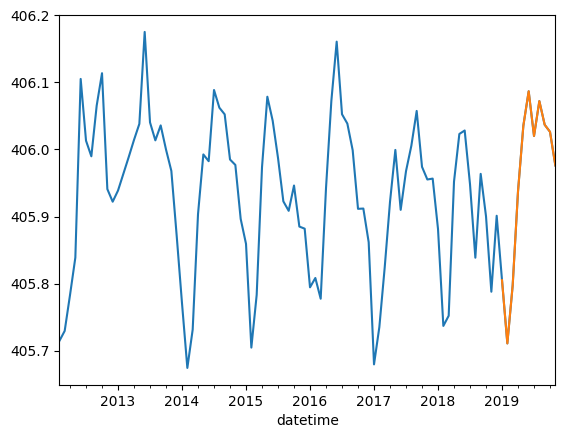

In [29]:
import matplotlib.pyplot as plt
dwfm1["water_level"].plot()
dwfm1_results_test["water_level"].plot()

<AxesSubplot: xlabel='datetime'>

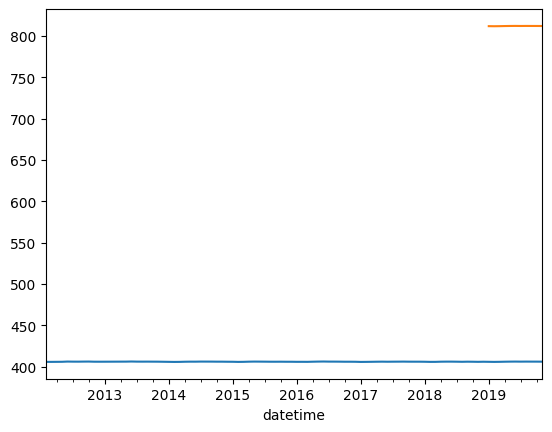

In [100]:
dwfm1["water_level"].plot()
test["water_level"].plot()

In [26]:
def mape(df_true, df_pred, epsilon=1e-4):
    # replacing every occurence of zero in the true values with epsilon
    df_true[df_true == 0] = epsilon 
    
    error = df_true - df_pred # calculates the error
    
    return 100 * np.mean(np.abs(error/df_true), axis=0) # resturns the MAPE
 
# importing mean square error
from sklearn.metrics import mean_squared_error as mse

# defining a function to return a dataframe of rmse and mape scores
def get_rmse_and_mape(df_true, df_pred):
    results = {'RMSE': mse(np.array(df_true), np.array(df_pred), multioutput='raw_values', squared=False), 
               'MAPE (%)': mape(np.array(df_true), np.array(df_pred))}
    
    return pd.DataFrame(results, index=df_true.columns)

In [27]:
get_rmse_and_mape(dwfm1_results_test, dwfm1_results_pred)

,RMSE,MAPE (%)
suction_tension (20cm),9.192841,140.667621
suction_tension (40cm),6.299577,148.752345
suction_tension (70cm),4.442690,116.963084
water_temperature,15.076345,98.033314
barometric_pressure_qfe,967.788213,99.952658
dew_point,9.325815,134.778614
water_level,405.949770,99.998730
inflow_linth (m3/s),63.144483,97.450284
outflow_limmat (m3/s),102.263393,99.045204
precipitation (mm),94.127651,109.657181


In [28]:
get_rmse_and_mape(dwfm1_results_test, dvar_results_forecast)

,RMSE,MAPE (%)
suction_tension (20cm),5.195731,82.305969
suction_tension (40cm),7.330010,166.643712
suction_tension (70cm),4.184431,105.666800
water_temperature,2.370493,16.493850
barometric_pressure_qfe,9.460509,0.806390
dew_point,3.311743,92.417862
water_level,0.076490,0.016086
inflow_linth (m3/s),23.718008,45.163289
outflow_limmat (m3/s),35.216148,37.217558
precipitation (mm),110.679829,174.746850


0.25, 4
RMSE	MAPE (%)
suction_tension (20cm)	39.777598	3.859315e+02
suction_tension (40cm)	58.472805	1.203837e+03
suction_tension (70cm)	51.781435	1.042221e+03
water_temperature	3.494939	3.449138e+01
barometric_pressure_qfe	27.856811	2.285538e+00
dew_point	6.803127	1.443429e+02
water_level	0.666495	1.483449e-01
inflow_linth (m3/s)	167.623961	3.249980e+02
outflow_limmat (m3/s)	414.221200	4.463171e+02
precipitation (mm)	506.140995	2.301734e+06
Evapotranspiration (mm)	124.154437	9.457566e+02

0.25, 3
RMSE	MAPE (%)
suction_tension (20cm)	118.012172	1795.792200
suction_tension (40cm)	105.018189	2423.592043
suction_tension (70cm)	86.816946	1921.495207
water_temperature	3.574092	29.735103
barometric_pressure_qfe	8.740773	0.723549
dew_point	8.757372	242.172573
water_level	0.135095	0.025559
inflow_linth (m3/s)	25.470038	52.713480
outflow_limmat (m3/s)	80.160559	97.376541
precipitation (mm)	178.110197	442635.078760
Evapotranspiration (mm)	45.186362	278.807905

0.25, 2
RMSE	MAPE (%)
suction_tension (20cm)	57.576116	764.579111
suction_tension (40cm)	48.200207	878.202411
suction_tension (70cm)	21.523784	251.304051
water_temperature	3.632041	21.724077
barometric_pressure_qfe	37.991883	3.423264
dew_point	4.325419	75.949693
water_level	0.159864	0.034445
inflow_linth (m3/s)	72.330391	159.500035
outflow_limmat (m3/s)	165.539477	216.226717
precipitation (mm)	201.207720	504805.722857
Evapotranspiration (mm)	89.503467	625.683876